In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
from PIL import Image
import numpy as np
import shutil
base_folder = r"C:\Users\Sigma\Downloads\ttts\archive\test_data"
cats_folder = os.path.join(base_folder, r"C:\Users\Sigma\Downloads\ttts\archive\test_data\cats")
dogs_folder = os.path.join(base_folder, r"C:\Users\Sigma\Downloads\ttts\archive\test_data\dogs")
output_folder = r"C:\Users\Sigma\Downloads\ttts\after processing"
output_cats_folder = os.path.join(output_folder, r"C:\Users\Sigma\Downloads\ttts\after processing\catsss")
output_dogs_folder = os.path.join(output_folder, r"C:\Users\Sigma\Downloads\ttts\after processing\dogsss")
os.makedirs(output_cats_folder, exist_ok=True)
os.makedirs(output_dogs_folder, exist_ok=True)
target_size = (150, 150)
def process_and_save_images(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg','.webp')):
            image_path = os.path.join(input_folder, filename)
            with Image.open(image_path) as img:
                img = img.resize(target_size)
                img_array = np.array(img) / 255.0

                processed_img = Image.fromarray((img_array * 255).astype(np.uint8))
                processed_img.save(os.path.join(output_folder, filename))
process_and_save_images(cats_folder, output_cats_folder)
process_and_save_images(dogs_folder, output_dogs_folder)
print("تمت معالجة الصور وحفظها في المجلدات الجديدة.")

تمت معالجة الصور وحفظها في المجلدات الجديدة.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image
processed_cats_folder = r"C:\Users\Sigma\Downloads\ttts\after processing\catsss"
processed_dogs_folder = r"C:\Users\Sigma\Downloads\ttts\after processing\dogsss"
augmented_cats_folder = r"C:\Users\Sigma\Downloads\ttts\after processing\catsss"
augmented_dogs_folder = r"C:\Users\Sigma\Downloads\ttts\after processing\dogsss"
os.makedirs(augmented_cats_folder, exist_ok=True)
os.makedirs(augmented_dogs_folder, exist_ok=True)
def augment_images(input_folder, output_folder, num_augmented_images=8):
  datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


  for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)
            img = img.resize((150, 150))
            img = img.convert("RGB")
            img_array = np.array(img)

            img_array = np.expand_dims(img_array, axis=0)
            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_folder, save_prefix="aug", save_format="jpeg"):
                i += 1
                if i >= num_augmented_images:
                    break
augment_images(processed_cats_folder, augmented_cats_folder)
augment_images(processed_dogs_folder, augmented_dogs_folder)

print("تم إنشاء صور Augmentation جديدة!")


تم إنشاء صور Augmentation جديدة!


In [3]:
import os
processed_cats_folder = r"C:\Users\Sigma\Downloads\ttts\after processing\catsss"
processed_dogs_folder = r"C:\Users\Sigma\Downloads\ttts\after processing\dogsss"
num_cats = len([f for f in os.listdir(processed_cats_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))])
num_dogs = len([f for f in os.listdir(processed_dogs_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))])
print(f"عدد الصور في فئة القطط: {num_cats}")
print(f"عدد الصور في فئة الكلاب: {num_dogs}")

عدد الصور في فئة القطط: 5908
عدد الصور في فئة الكلاب: 5947


In [4]:
def analyze_image_dimensions(folder):
    dimensions = []
    for img_name in os.listdir(folder):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
            img_path = os.path.join(folder, img_name)
            img = Image.open(img_path)
            dimensions.append(img.size)
    return dimensions
cat_dimensions = analyze_image_dimensions(processed_cats_folder)
dog_dimensions = analyze_image_dimensions(processed_dogs_folder)
print("أبعاد صور القطط: ", set(cat_dimensions))
print("أبعاد صور الكلاب: ", set(dog_dimensions))

أبعاد صور القطط:  {(150, 150)}
أبعاد صور الكلاب:  {(150, 150)}


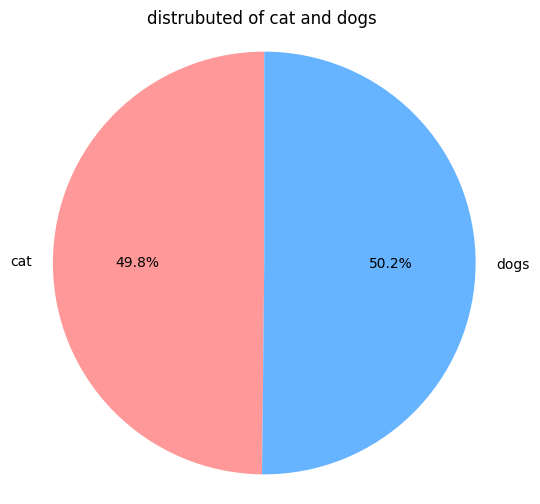

In [5]:
import matplotlib.pyplot as plt
labels = ['cat', 'dogs']
sizes = [num_cats, num_dogs]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # لضمان أن الدائرة ستكون دائرية
plt.title('distrubuted of cat and dogs ')
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = r"C:\Users\Sigma\Downloads\ttts\after processing"
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # إعادة قياس الصور وقسم البيانات
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 9484 images belonging to 2 classes.
Found 2370 images belonging to 2 classes.


In [7]:
import numpy as np
X_train, y_train = [], []
for i in range(len(train_generator)):
    X_batch, y_batch = train_generator[i]
    X_train.extend(X_batch)
    y_train.extend(y_batch)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val, y_val = [], []
for i in range(len(validation_generator)):
    X_batch, y_batch = validation_generator[i]
    X_val.extend(X_batch)
    y_val.extend(y_batch)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [10]:
!pip install scikeras
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [8]:

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_val.reshape(X_val.shape[0], -1)


## NN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
def create_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(150 * 150 * 3,)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("ANN_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train_flattened, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test_flattened, y_val),
    callbacks=[checkpoint, early_stopping, learning_rate_reduction]
)
y_pred = (model.predict(X_test_flattened) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

Epoch 1/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5217 - loss: 0.7398
Epoch 1: val_accuracy improved from -inf to 0.54231, saving model to ANN_model.keras
293/293 ━━━━━━━━━━━━━━━━━━━━ 70s 223ms/step - accuracy: 0.5218 - loss: 0.7397 - val_accuracy: 0.5423 - val_loss: 0.6819 - learning_rate: 1.0000e-04
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5521 - loss: 0.6864
Epoch 2: val_accuracy did not improve from 0.54231
293/293 ━━━━━━━━━━━━━━━━━━━━ 76s 204ms/step - accuracy: 0.5521 - loss: 0.6864 - val_accuracy: 0.5299 - val_loss: 0.6888 - learning_rate: 1.0000e-04
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.5523 - loss: 0.6824
Epoch 3: val_accuracy improved from 0.54231 to 0.58675, saving model to ANN_model.keras
293/293 ━━━━━━━━━━━━━━━━━━━━ 80s 198ms/step - accuracy: 0.5524 - loss: 0.6824 - val_accuracy: 0.5868 - val_loss: 0.6661 - learning_rate: 1.0000e-04
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.

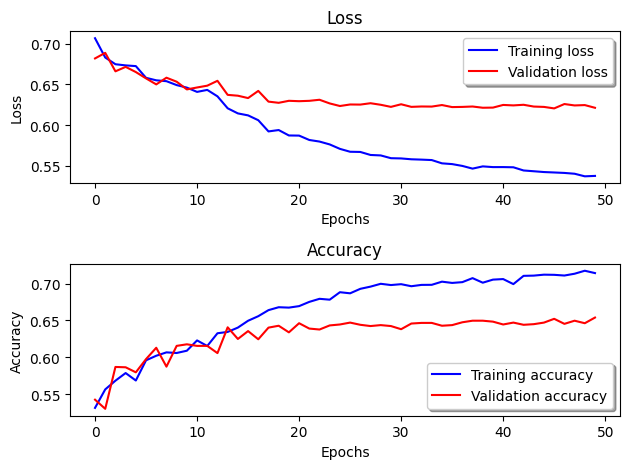

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

image_path = "/content/golden-retriever-bokeh-labrador-lawn-dogs.jpg"
model_path = "/content/ANN_model.keras"

img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = img_array / 255.0
img_flattened = img_array.flatten()
img_flattened = np.expand_dims(img_flattened, axis=0)

model = load_model(model_path)


prediction = model.predict(img_flattened)


if prediction[0][0] > 0.5:
    print(f"The image is a Dog with probability {prediction[0][0]:.2f}")
else:
    print(f"The image is a Cat with probability {1 - prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
The image is a Dog with probability 0.91


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       8,640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,001,029 (99.19 MB)

 Trainable params: 8,667,009 (33.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,334,020 (66.12 MB)

None


## NN2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
def create_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(150 * 150 * 3,)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("ANN_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train_flattened, y_train,
    batch_size=16,
    epochs=70,
    validation_data=(X_test_flattened, y_val),
    callbacks=[checkpoint, early_stopping, learning_rate_reduction]
)
y_pred = (model.predict(X_test_flattened) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

Epoch 1/70
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5274 - loss: 0.7386
Epoch 1: val_accuracy improved from -inf to 0.56838, saving model to ANN_model.keras
586/586 ━━━━━━━━━━━━━━━━━━━━ 80s 132ms/step - accuracy: 0.5274 - loss: 0.7385 - val_accuracy: 0.5684 - val_loss: 0.6823 - learning_rate: 1.0000e-04
Epoch 2/70
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5398 - loss: 0.6883
Epoch 2: val_accuracy did not improve from 0.56838
586/586 ━━━━━━━━━━━━━━━━━━━━ 90s 147ms/step - accuracy: 0.5398 - loss: 0.6883 - val_accuracy: 0.5577 - val_loss: 0.6820 - learning_rate: 1.0000e-04
Epoch 3/70
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.5677 - loss: 0.6807
Epoch 3: val_accuracy did not improve from 0.56838
586/586 ━━━━━━━━━━━━━━━━━━━━ 161s 179ms/step - accuracy: 0.5677 - loss: 0.6807 - val_accuracy: 0.5675 - val_loss: 0.6743 - learning_rate: 1.0000e-04
Epoch 4/70
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5541 - loss: 0.6832
Epoch 4: val_acc

In [ ]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │       8,640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,001,029 (99.19 MB)

 Trainable params: 8,667,009 (33.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,334,020 (66.12 MB)

None


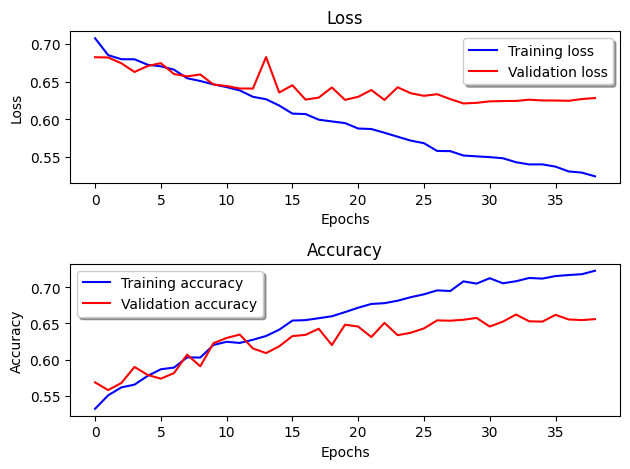

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

## NN3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
from tensorflow.keras.regularizers import l2
def create_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu',kernel_regularizer=l2(0.01), input_shape=(150 * 150 * 3,)))
    model.add(Dense(units=128, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(units=64, activation='relu',,kernel_regularizer=l2(0.01)))
    model.add(Dense(units=32, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("ANN_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = model.fit(
    X_train_flattened, y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test_flattened, y_val),
    callbacks=[checkpoint, early_stopping, learning_rate_reduction]
)
y_pred = (model.predict(X_test_flattened) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

In [ ]:
print(model.summary())

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

## CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
model = create_model()
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cats_dogs_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=12,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stopping, learning_rate_reduction]
)
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

Epoch 1/12
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5294 - loss: 0.6915
Epoch 1: val_accuracy improved from -inf to 0.62053, saving model to best_cats_dogs_model.keras
294/294 ━━━━━━━━━━━━━━━━━━━━ 74s 194ms/step - accuracy: 0.5295 - loss: 0.6914 - val_accuracy: 0.6205 - val_loss: 0.6590 - learning_rate: 1.0000e-04
Epoch 2/12
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6598 - loss: 0.6197
Epoch 2: val_accuracy improved from 0.62053 to 0.68526, saving model to best_cats_dogs_model.keras
294/294 ━━━━━━━━━━━━━━━━━━━━ 49s 130ms/step - accuracy: 0.6599 - loss: 0.6197 - val_accuracy: 0.6853 - val_loss: 0.5933 - learning_rate: 1.0000e-04
Epoch 3/12
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7201 - loss: 0.5536
Epoch 3: val_accuracy improved from 0.68526 to 0.72274, saving model to best_cats_dogs_model.keras
294/294 ━━━━━━━━━━━━━━━━━━━━ 52s 168ms/step - accuracy: 0.7201 - loss: 0.5536 - val_accuracy: 0.7227 - val_loss: 0.5479 - learning_rate: 1.0000e-0

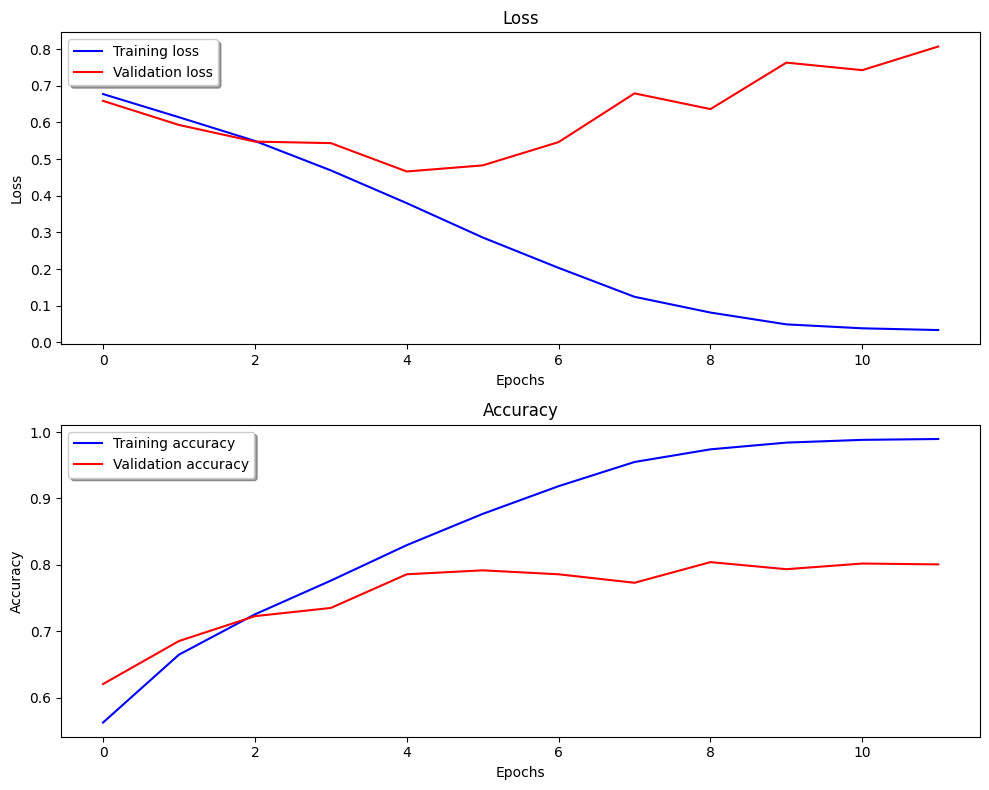

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # أضف حجم الشكل لتحسين العرض
# الرسم الأول: الخسارة
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend(loc='best', shadow=True)

# الرسم الثاني: الدقة
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc='best', shadow=True)

# عرض الرسوم
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model

# تحميل النموذج
model_path = r"/content/best_cats_dogs_model.keras"
model = load_model(model_path)

# تحميل الصورة ومعالجتها
image_path = r"/content/OIP (6).jpg"
img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد إضافي للمصفوفة
img_array = img_array / 255.0  # تحويل القيم لتكون بين 0 و1

# التنبؤ بالفئة باستخدام النموذج
prediction = model.predict(img_array)  # استبدل history بـ model
if prediction[0][0] > 0.5:
    print(f"The image is a *Dog* with probability {prediction[0][0]:.2f}")
else:
    print(f"The image is a *Cat* with probability {1 - prediction[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image is a *Cat* with probability 0.98


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model

# تحميل النموذج
model_path = r"/content/best_cats_dogs_model.keras"
model = load_model(model_path)

# تحميل الصورة ومعالجتها
image_path = r"/content/OIP (4).jpg"
img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد إضافي للمصفوفة
img_array = img_array / 255.0  # تحويل القيم لتكون بين 0 و1

# التنبؤ بالفئة باستخدام النموذج
prediction = model.predict(img_array)  # استبدل history بـ model
if prediction[0][0] > 0.5:
    print(f"The image is a *Dog* with probability {prediction[0][0]:.2f}")
else:
    print(f"The image is a *Cat* with probability {1 - prediction[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
The image is a *Cat* with probability 1.00


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model

# تحميل النموذج
model_path = r"/content/best_cats_dogs_model.keras"
model = load_model(model_path)

# تحميل الصورة ومعالجتها
image_path = r"/content/golden-retriever-bokeh-labrador-lawn-dogs.jpg"
img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد إضافي للمصفوفة
img_array = img_array / 255.0  # تحويل القيم لتكون بين 0 و1

# التنبؤ بالفئة باستخدام النموذج
prediction = model.predict(img_array)  # استبدل history بـ model
if prediction[0][0] > 0.5:
    print(f"The image is a *Dog* with probability {prediction[0][0]:.2f}")
else:
    print(f"The image is a *Cat* with probability {1 - prediction[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
The image is a *Dog* with probability 0.57


In [ ]:

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 147968)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      37,880,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,519,749 (436.86 MB)

 Trainable params: 38,173,249 (145.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76,346,500 (291.24 MB)

None


# CNN 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
model = create_model()
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cats_dogs_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stopping, learning_rate_reduction]
)
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

Epoch 1/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5216 - loss: 0.6954
Epoch 1: val_accuracy improved from -inf to 0.61712, saving model to best_cats_dogs_model.keras
294/294 ━━━━━━━━━━━━━━━━━━━━ 75s 236ms/step - accuracy: 0.5217 - loss: 0.6953 - val_accuracy: 0.6171 - val_loss: 0.6648 - learning_rate: 1.0000e-04
Epoch 2/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6357 - loss: 0.6439
Epoch 2: val_accuracy improved from 0.61712 to 0.65290, saving model to best_cats_dogs_model.keras
294/294 ━━━━━━━━━━━━━━━━━━━━ 68s 200ms/step - accuracy: 0.6357 - loss: 0.6439 - val_accuracy: 0.6529 - val_loss: 0.6190 - learning_rate: 1.0000e-04
Epoch 3/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7060 - loss: 0.5768
Epoch 3: val_accuracy improved from 0.65290 to 0.71039, saving model to best_cats_dogs_model.keras
294/294 ━━━━━━━━━━━━━━━━━━━━ 79s 188ms/step - accuracy: 0.7061 - loss: 0.5768 - val_accuracy: 0.7104 - val_loss: 0.5613 - learning_rate: 1.0000e-0

# CNN3

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
model = create_model()
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cats_dogs_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stopping, learning_rate_reduction]
)
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5420 - loss: 0.6918
Epoch 1: val_accuracy improved from -inf to 0.66301, saving model to best_cats_dogs_model.keras
593/593 ━━━━━━━━━━━━━━━━━━━━ 76s 101ms/step - accuracy: 0.5420 - loss: 0.6918 - val_accuracy: 0.6630 - val_loss: 0.6447 - learning_rate: 1.0000e-04
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6512 - loss: 0.6290
Epoch 2: val_accuracy improved from 0.66301 to 0.69675, saving model to best_cats_dogs_model.keras
593/593 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.6512 - loss: 0.6289 - val_accuracy: 0.6968 - val_loss: 0.5794 - learning_rate: 1.0000e-04
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7163 - loss: 0.5484
Epoch 3: val_accuracy improved from 0.69675 to 0.70181, saving model to best_cats_dogs_model.keras
593/593 ━━━━━━━━━━━━━━━━━━━━ 52s 87ms/step - accuracy: 0.7164 - loss: 0.5484 - val_accuracy: 0.7018 - val_loss: 0.5650 - learning_rate: 1.0000e-04
Epo

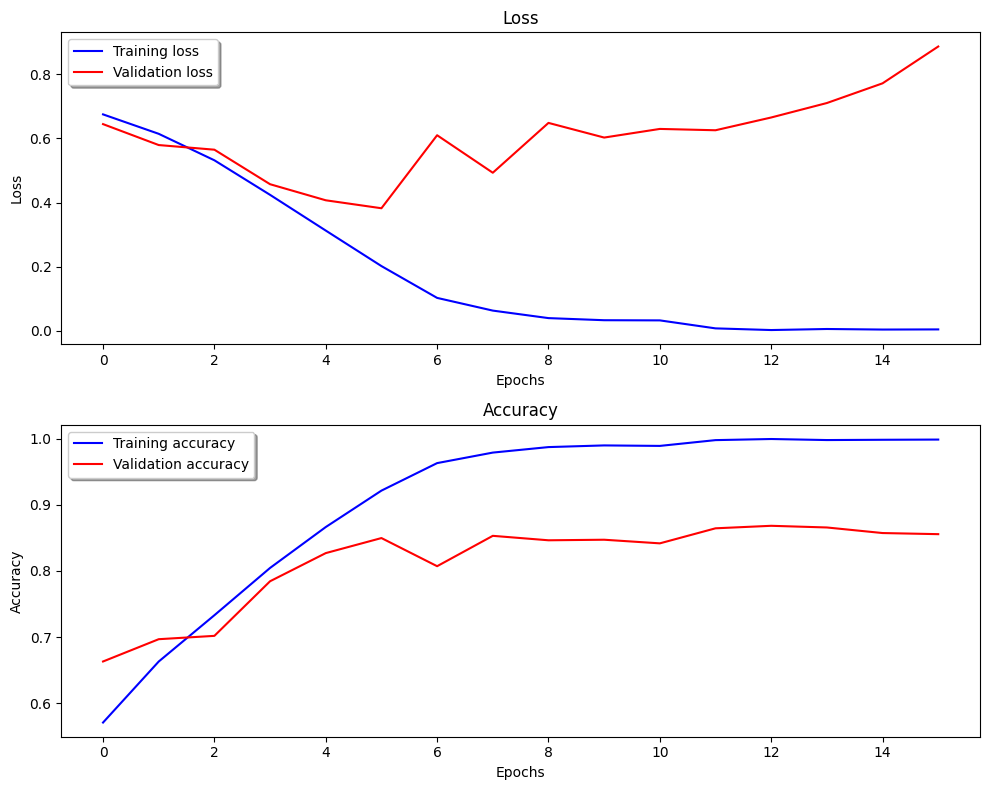

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # أضف حجم الشكل لتحسين العرض
# الرسم الأول: الخسارة
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend(loc='best', shadow=True)

# الرسم الثاني: الدقة
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc='best', shadow=True)

# عرض الرسوم
plt.tight_layout()
plt.show()


In [26]:

print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 146, 146, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 69, 69, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 147968)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      37,880,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,519,749 (436.86 MB)

 Trainable params: 38,173,249 (145.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76,346,500 (291.24 MB)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


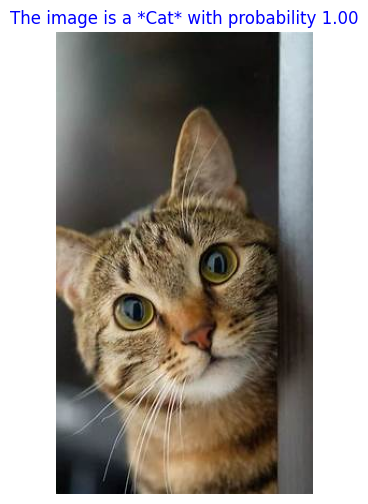

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model_path = r"/content/best_cats_dogs_model.keras"
model = load_model(model_path)
image_path = r"/content/OIP (4).jpg"
img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    label = f"The image is a *Dog* with probability {prediction[0][0]:.2f}"
else:
    label = f"The image is a *Cat* with probability {1 - prediction[0][0]:.2f}"
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))
plt.title(label, fontsize=12, color="blue")
plt.axis('off')
plt.show()


# CNN4

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
model = create_model()
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cats_dogs_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint, early_stopping, learning_rate_reduction]
)
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

Epoch 1/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5120 - loss: 0.7003
Epoch 1: val_accuracy improved from -inf to 0.57191, saving model to best_cats_dogs_model.keras
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 86s 62ms/step - accuracy: 0.5120 - loss: 0.7003 - val_accuracy: 0.5719 - val_loss: 0.6695 - learning_rate: 1.0000e-04
Epoch 2/30
1185/1186 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6130 - loss: 0.6586
Epoch 2: val_accuracy improved from 0.57191 to 0.70055, saving model to best_cats_dogs_model.keras
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 132s 62ms/step - accuracy: 0.6130 - loss: 0.6586 - val_accuracy: 0.7005 - val_loss: 0.5897 - learning_rate: 1.0000e-04
Epoch 3/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7135 - loss: 0.5655
Epoch 3: val_accuracy improved from 0.70055 to 0.74779, saving model to best_cats_dogs_model.keras
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 71s 60ms/step - accuracy: 0.7135 - loss: 0.5655 - val_accuracy: 0.7478 - val_loss: 0.5136 - learning_rate: 1.

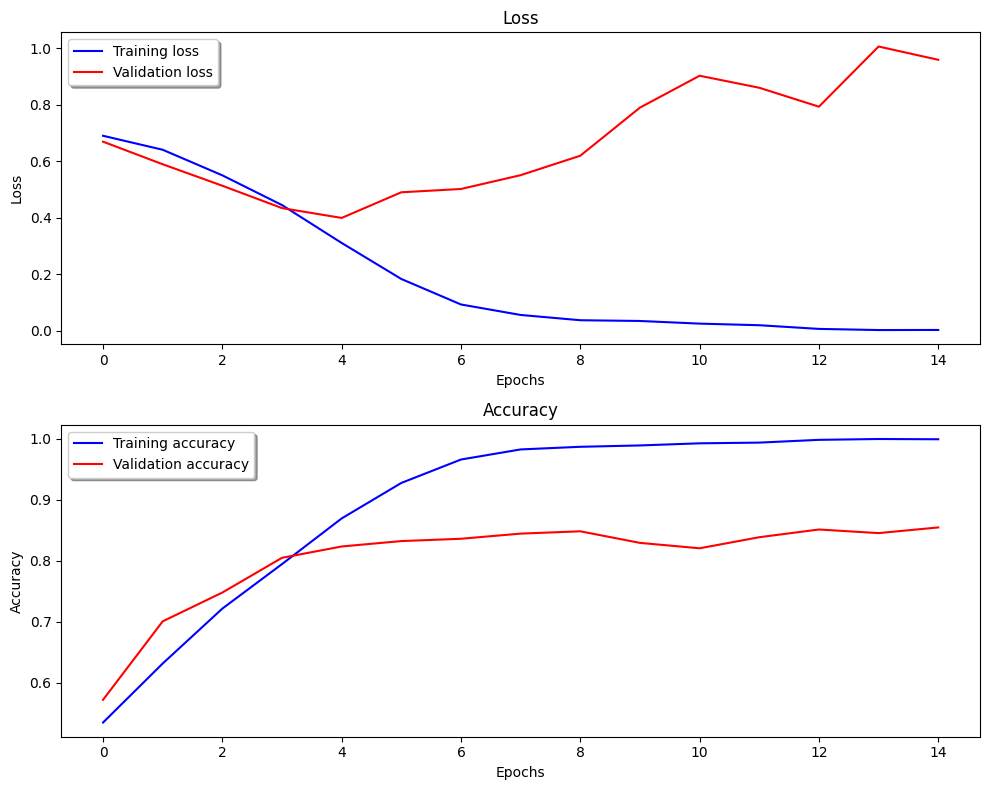

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend(loc='best', shadow=True)


ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()


In [18]:

print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 146, 146, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 69, 69, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 147968)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      37,880,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,519,749 (436.86 MB)

 Trainable params: 38,173,249 (145.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76,346,500 (291.24 MB)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


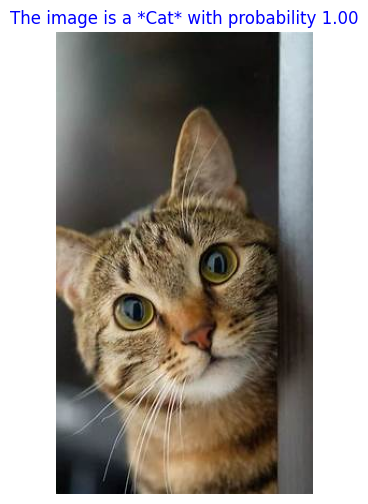

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model_path = r"/content/best_cats_dogs_model.keras"
model = load_model(model_path)
image_path = r"/content/OIP (4).jpg"
img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    label = f"The image is a *Dog* with probability {prediction[0][0]:.2f}"
else:
    label = f"The image is a *Cat* with probability {1 - prediction[0][0]:.2f}"
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))
plt.title(label, fontsize=12, color="blue")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step


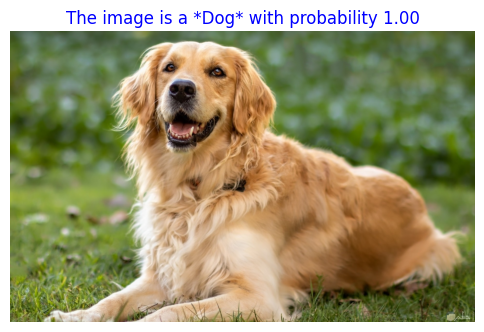

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model_path = r"/content/best_cats_dogs_model.keras"
model = load_model(model_path)


image_path = r"/content/golden-retriever-bokeh-labrador-lawn-dogs.jpg"
img = load_img(image_path, target_size=(150, 150))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    label = f"The image is a *Dog* with probability {prediction[0][0]:.2f}"
else:
    label = f"The image is a *Cat* with probability {1 - prediction[0][0]:.2f}"
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))
plt.title(label, fontsize=12, color="blue")
plt.axis('off')
plt.show()
